In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns

In [408]:
#importing data
df=pd.read_csv("/content/spam.csv", encoding="latin-1")

In [409]:
df.head(6)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN


STEP 1: Data Cleaning using pandas

In [410]:
df.shape  #5572 rows and 5 columns

(5572, 5)

In [411]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [412]:
#droping the not necessary columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [413]:
df.sample(5)

,v1,v2
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th..."
689,spam,<Forwarded from 448712404000>Please CALL 08712...
1386,ham,All e best 4 ur exam later.
3585,spam,I am hot n horny and willing I live local to y...
5118,ham,Are you driving or training?


clearly, v1 column shows whether text is spam or not and v2 shows the text.
v1=output column
v2=text column

In [414]:
# renaming the cols
df.rename(columns={'v1':'output','v2':'text'},inplace=True)
df.sample(7)

,output,text
3823,ham,I miss you so much I'm so desparate I have rec...
3117,ham,R u saying i should re order the slippers cos ...
4320,ham,"K, jason says he's gonna be around so I'll be ..."
3501,ham,I will come to ur home now
3562,spam,Auction round 4. The highest bid is now å£54. ...
4940,ham,Omg you can make a wedding chapel in frontierv...
4225,ham,"Ok thats cool. Its , just off either raglan rd..."


In [415]:
df.describe()

,output,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [416]:
df.isnull().sum()

output    0
text      0
dtype: int64

In [417]:
# check for duplicate values
df.duplicated().sum()

403

In [418]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [419]:
df.duplicated().sum()

0

In [420]:
df.shape

(5169, 2)

 our data has no nan values to be removed or replaced and the duplicate values have been removed

LabelEncoder is used to encode categorical labels (classes or target variable) into numerical values.

Before Label Encoding:

'ham' represents non-spam messages.
'spam' represents spam messages.
After Label Encoding:

'ham' might be encoded as 0.
'spam' might be encoded as 1.

In [421]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [422]:
df['output'] = encoder.fit_transform(df['output'])

In [423]:
df.tail()

,output,text
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [424]:
df['output'].value_counts()

#this shows ham=4516 and spam=653

0    4516
1     653
Name: output, dtype: int64

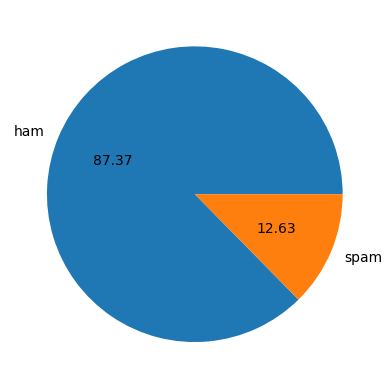

In [425]:
plt.pie(df['output'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

#shows data have more ham i.e imbalanced

In [426]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

making new columns: no.of characters , no.of words, no.of sentences

In [427]:
df['no_characters'] = df['text'].apply(len)

In [428]:
df.head()

,output,text,no_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [429]:
df['no_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

#creating a new column ('no_words') in the DataFrame that represents the number of words in each text entry, using the NLTK library for tokenization

In [430]:
df.head()

,output,text,no_characters,no_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [431]:
df['no_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

#ambda function tokenizes the text into sentences using the nltk.sent_tokenize function and calculates the number of sentences in each text.

In [432]:
df.head()

,output,text,no_characters,no_words,no_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [433]:
df[['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


analysing, spam and ham seprately

In [434]:
df[df['output'] == 1][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [435]:
df[df['output'] == 0][['no_characters','no_words','no_sentences']].describe()

,no_characters,no_words,no_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='no_words', ylabel='Count'>

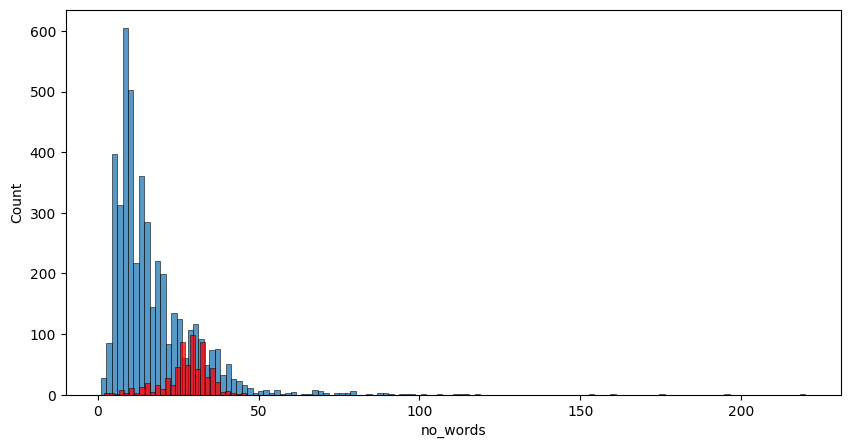

In [436]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['output'] == 0]['no_words'])
sns.histplot(df[df['output'] == 1]['no_words'],color='red')

<Axes: xlabel='no_characters', ylabel='Count'>

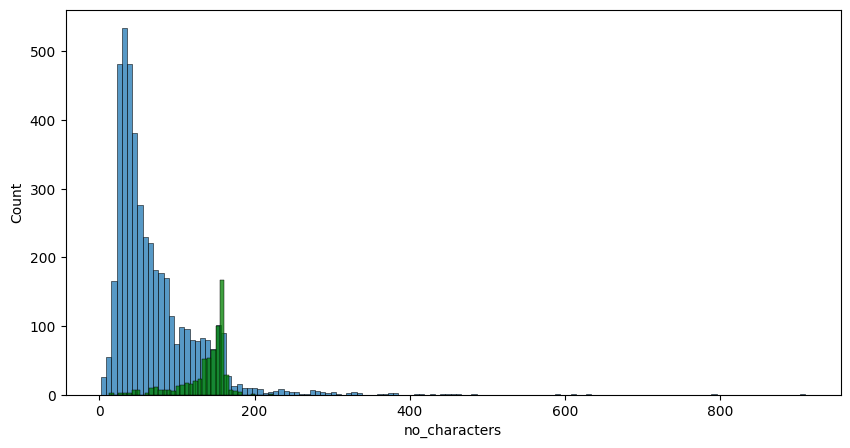

In [437]:
plt.figure(figsize=(10,5))
sns.histplot(df[df['output'] == 0]['no_characters'])
sns.histplot(df[df['output'] == 1]['no_characters'],color='green')

we can clearly see, spam have more no.of words and no.of characters

In [438]:
df.corr()

<ipython-input-438-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,output,no_characters,no_words,no_sentences
output,1.000000,0.384717,0.262912,0.263939
no_characters,0.384717,1.000000,0.965760,0.624139
no_words,0.262912,0.965760,1.000000,0.679971
no_sentences,0.263939,0.624139,0.679971,1.000000


<ipython-input-439-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

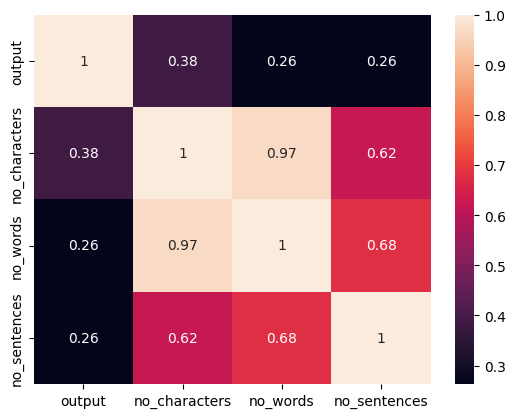

In [439]:
sns.heatmap(df.corr(),annot=True)

no_characters vs. no_words: There is a strong positive correlation of approximately 0.966 between 'no_characters' and 'no_words'. This indicates a strong positive linear relationship, which is expected, as more characters in a text generally mean more words.

no_characters vs. no_sentences: There is a moderate positive correlation of approximately 0.624 between 'no_characters' and 'no_sentences'. This suggests a moderate positive linear relationship.

no_words vs. no_sentences: There is a moderate positive correlation of approximately 0.680 between 'no_words' and 'no_sentences'. This indicates a moderate positive linear relationship.

Preprocessing
Lower case
Tokenization
Removing special characters
Removing stop words and punctuation
Stemming

In [440]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

In [441]:

nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [442]:
ps=PorterStemmer()

#This line creates an instance of the Porter Stemmer from NLTK, named 'ps'. The Porter Stemmer is used for stemming, which involves reducing words to their root or base form.


In [443]:
ps.stem('enjoying')

'enjoy'

In [444]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

Converts text to lowercase.

Tokenizes the text into words.

Removes non-alphanumeric characters.

Removes English stopwords and punctuation.

Applies stemming using the Porter Stemmer.

The function transform_text applied to the input "Did you like mY pResentation on Ml" would return the processed text: "like present ml". It has been converted to lowercase, tokenized, non-alphanumeric characters removed, stopwords removed, and words stemmed.

In [445]:
transform_text("Did you like mY pResentation on Ml")

'like present ml'

In [446]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k?")

'gon na home soon want talk stuff anymor tonight k'

This line creates a new column 'transformed_text' in the DataFrame 'df', containing the preprocessed and transformed text for each message. It applies the transform_text function to the 'text' column using the apply method.

In [447]:
df['transformed_text'] = df['text'].apply(transform_text)

In [448]:
df.head()

,output,text,no_characters,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though



This code imports the WordCloud class from the 'wordcloud' library and creates an instance named 'wc'. The parameters specified are width, height, minimum font size, and background color for generating the word cloud visualization.

In [449]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [450]:
spam_wc = wc.generate(df[df['output'] == 1]['transformed_text'].str.cat(sep=" "))
#str.cat(sep=" ") concatenates the transformed text of all spam messages into a single string separated by spaces.

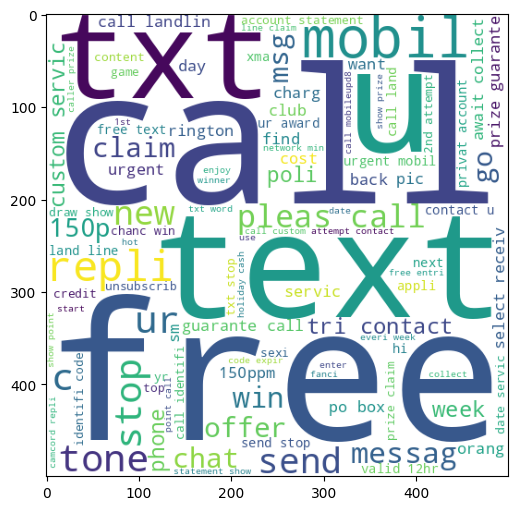

In [451]:
plt.figure(figsize=(10,6))
plt.imshow(spam_wc)

In [452]:
ham_wc = wc.generate(df[df['output'] == 0]['transformed_text'].str.cat(sep=" "))

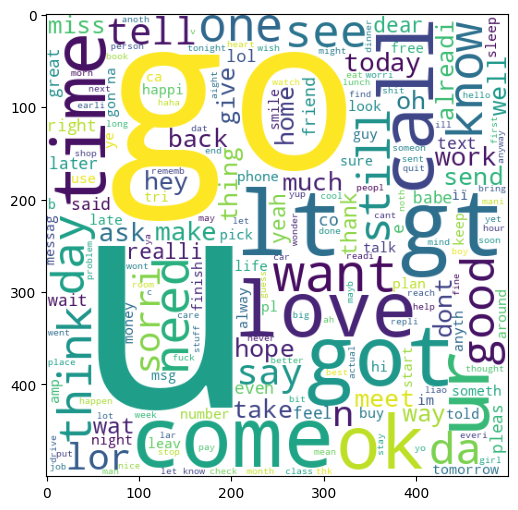

In [453]:
plt.figure(figsize=(10,6))
plt.imshow(ham_wc)

In [454]:
df.head()

,output,text,no_characters,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


This code creates a list named 'spam_corpus' containing individual words from the transformed text of spam messages in the DataFrame 'df'. It iterates through each transformed text, splits it into words, and appends each word to the 'spam_corpus' list.

In [455]:
spam_corpus = []
for msg in  df[df['output'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [456]:
len(spam_corpus)

9939

In [457]:
ham_corpus = []
for msg in df[df['output'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [458]:
len(ham_corpus)

35404

In [459]:
df.head()

,output,text,no_characters,no_words,no_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


CountVectorizer: Counts word occurrences in each document, creating a matrix of word frequencies.

TfidfVectorizer: Considers not just word frequencies but also the importance of words in the entire dataset using TF-IDF. Often more informative than simple word counts.

In [460]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [461]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
#This line uses the fit_transform method of the TfidfVectorizer instance (tfidf) to transform the 'transformed_text' column in the DataFrame 'df' into a TF-IDF matrix.

In [462]:
X.shape

(5169, 3000)

In [463]:
y = df['output'].values

In [464]:
from sklearn.model_selection import train_test_split

In [465]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [466]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [467]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [468]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [469]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [470]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


Gaussian Naive Bayes (gnb):

Accuracy: 89.17%
Precision: 56.44%

Multinomial Naive Bayes (mnb):

Accuracy: 97.20%
Precision: 100.0%

Bernoulli Naive Bayes (bnb):

Accuracy: 98.36%
Precision: 99.19%

Based on accuracy and precision, the Bernoulli Naive Bayes (bnb) model seems to perform the best in this context. It achieved the highest accuracy and a high precision score. However, it's essential to consider the specific requirements and goals of your application when choosing a model. Sometimes, a balance between precision and recall is crucial, depending on the consequences of false positives and false negatives in your task.

In [471]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [472]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)


created a dictionary named clfs that maps short names to their respective classifier instances:

'SVC': Support Vector Machine with a sigmoid kernel (svc).

'KN': K-Nearest Neighbors (knc).

'NB': Multinomial Naive Bayes (mnb).

'DT': Decision Tree with a maximum depth of 5 (dtc).

'LR': Logistic Regression (lrc).

'RF': Random Forest with 50 trees (rfc).

'AdaBoost': AdaBoost with 50 weak learners (abc).

'BgC': Bagging with 50 base classifiers (bc).

'ETC': Extra Trees with 50 trees (etc).

'GBDT': Gradient Boosting with 50 trees (gbdt).

'xgb': XGBoost with 50 trees (xgb).

In [473]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}


In [474]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [475]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

 Support Vector Machine (svc) classifier:

Accuracy: 97.29%

Precision: 97.41%

This indicates that the SVM model performed well on the test data, achieving a high accuracy and precision.

In [476]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9303675048355899
Precision -  0.8173076923076923
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


 Random Forest (RF), Extra Trees (ETC), and XGBoost (xgb) demonstrate high accuracy and precision in this context.

In [477]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df


,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
6,AdaBoost,0.960348,0.929204
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217


reated a DataFrame named performance_df containing algorithm names, accuracy scores, and precision scores. The DataFrame is sorted in descending order based on precision scores. This can be helpful for easily comparing and visualizing the performance of different classifiers.






In [478]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,AdaBoost,Accuracy,0.960348
7,xgb,Accuracy,0.967118
8,GBDT,Accuracy,0.946809
9,BgC,Accuracy,0.958414


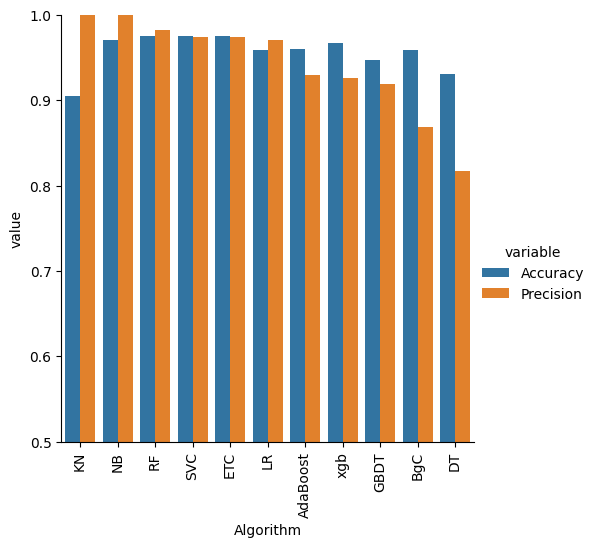

In [479]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

CONCLUSION TILL NOW:
Among the classifiers, Extra Trees (ETC) and Random Forest (RF) exhibit the highest precision and accuracy in spam detection.

Naive Bayes (NB) performs well, showing perfect precision but slightly lower accuracy.

Support Vector Machine (SVC) struggles with precision, likely due to class imbalance.

Decision Tree (DT) and K-Nearest Neighbors (KN) show lower performance compared to other models.

# model improve
# 1. Change the max_features parameter of TfIdf

In [480]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [481]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [482]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [483]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [484]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,xgb,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBDT,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


creating a Voting Classifier combines the strengths of multiple models to enhance overall performance, increase robustness, handle diverse aspects of the data, and provide flexibility in decision-making. It's a strategy to improve predictive accuracy and generalization by leveraging the strengths of different algorithms.

In [485]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [486]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [487]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [488]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


This indicates that the ensemble of Support Vector Machine, Multinomial Naive Bayes, and Extra Trees models, working together through the Voting Classifier, performed very well on the given task

In [489]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [490]:
from sklearn.ensemble import StackingClassifier

stacking combines predictions from diverse models (SVM, Naive Bayes, and Extra Trees) using a final meta-model (Random Forest). This approach aims to harness the strengths of each model, improving overall predictive accuracy and robustness.

In [491]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832


This indicates that the classifier performed well in making accurate predictions, with a high precision rate